In [1]:
import torch
from others.Config import Config
from model import Model
%load_ext autoreload
%autoreload 2

In [2]:
def main():
    # fixing seed for reproducibility
    if Config.verbose:
        print("Running configuration:")
        config_values = vars(Config)
        config_keys= [v for v, m in vars(Config).items() if not (v.startswith('_')  or callable(m))]
        for key in config_keys:
            print(f"    {key} : {config_values[key]}")
    torch.manual_seed(Config.seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # loading the dataset
    train_noisy_input, train_noisy_target = torch.load(Config.train_data_path)
    # instantiating the model and all its components
    n2n_model = Model()
    # training
    return n2n_model.train(train_noisy_input, train_noisy_target, num_epochs=Config.num_epochs)


In [3]:
import pickle
use_backup = True
if use_backup:
    file_name = "results.pkl"
    open_file = open(file_name, "rb")
    training_results = pickle.load(open_file)
    open_file.close()
else:
    training_results=[]

In [4]:
import matplotlib.pyplot as plt

def plot(data):

    fig, axs = plt.subplots(1, 2)
    axs.flat[0].plot(data[0], label= "Train Loss")
    axs.flat[0].plot(data[1], label= "Test Loss")
    axs.flat[0].set_title("Losses")
    axs.flat[0].legend()
    axs.flat[1].plot(data[2], label= "PSNR (db)")
    axs.flat[1].legend()

    #fig.supxlabel("Epochs")
    #fig.supylabel("Metrics")
    fig = plt.gcf()
    fig.set_size_inches(18, 5)

    plt.show()
    print(f"Elapsed time: {data[3]}")

In [5]:
#0
# First experiment we start with Unet with shared weights, no scheduler, using l2 loss
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 400
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : False
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0236 |test loss: 0.0048 |psnr(dB): 23.9454
Epoch: 2/15 |train loss: 0.0154 |test loss: 0.0040 |psnr(dB): 24.6611
Epoch: 3/15 |train loss: 0.0152 |test loss: 0.0043 |psnr(dB): 24.4836
Epoch: 4/15 |train loss: 0.0150 |test loss: 0.0039 |psnr(dB): 24.8435
Epoch: 5/15 |train loss: 0.0149 |test loss: 0.0040 |psnr(dB): 24.8592
Epoch: 6/15 |train loss: 0.0149 |test loss: 0.0039 |psnr(dB): 24.8995
Epoch: 7/15 |train loss: 0.0148 |test loss: 0.0038 |psnr(dB): 25.0015
Epoch: 8/15 |train loss: 0.0147 |test loss: 0.0039 |psnr(dB): 24.9495
Epoch: 9/15 |train loss: 0.0147

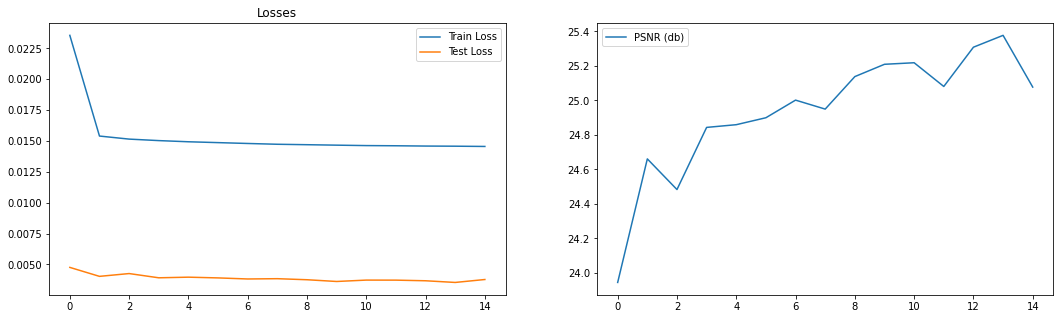

Elapsed time: 234.71607732772827


In [27]:
plot(training_results[0])

In [6]:
#1
# Same as before, but with l1 loss
# l2 loss seems better, this means that the noise has close to 0 mean, without that many outliers,
# otherwise l1 would have worked better (from paper of noise2noise)
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 400
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l1
    normalize : False
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0970 |test loss: 0.0459 |psnr(dB): 23.9038
Epoch: 2/15 |train loss: 0.0769 |test loss: 0.0424 |psnr(dB): 24.2941
Epoch: 3/15 |train loss: 0.0750 |test loss: 0.0436 |psnr(dB): 24.0282
Epoch: 4/15 |train loss: 0.0743 |test loss: 0.0409 |psnr(dB): 24.4976
Epoch: 5/15 |train loss: 0.0738 |test loss: 0.0412 |psnr(dB): 24.4207
Epoch: 6/15 |train loss: 0.0735 |test loss: 0.0417 |psnr(dB): 24.3281
Epoch: 7/15 |train loss: 0.0732 |test loss: 0.0408 |psnr(dB): 24.3909
Epoch: 8/15 |train loss: 0.0730 |test loss: 0.0418 |psnr(dB): 24.2976
Epoch: 9/15 |train loss: 0.0728

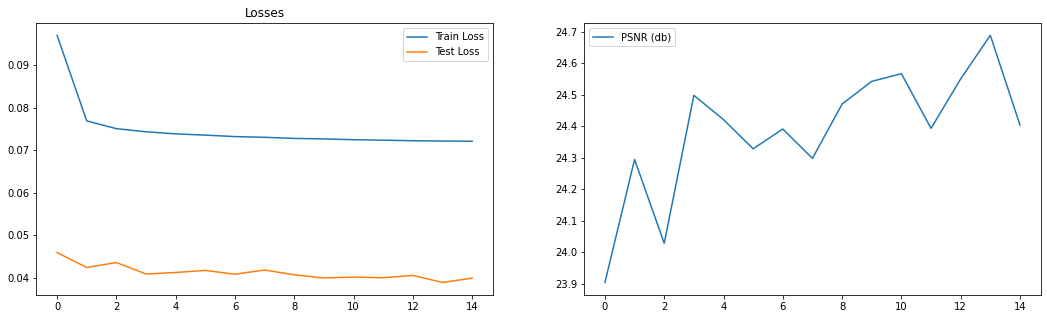

Elapsed time: 236.50331091880798


In [28]:
plot(training_results[1])

In [9]:
# 2
# Let's stick to l2 loss
# Now,Unet with leakyRelu and no shared weights, same as paper
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 400
    num_workers : 4
    device : None
    net : Unet2
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : False
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0917 |test loss: 0.0493 |psnr(dB): 13.5568
Epoch: 2/15 |train loss: 0.0586 |test loss: 0.0469 |psnr(dB): 13.7679
Epoch: 3/15 |train loss: 0.0579 |test loss: 0.0453 |psnr(dB): 13.9338
Epoch: 4/15 |train loss: 0.0577 |test loss: 0.0463 |psnr(dB): 13.8367
Epoch: 5/15 |train loss: 0.0576 |test loss: 0.0461 |psnr(dB): 13.8896
Epoch: 6/15 |train loss: 0.0572 |test loss: 0.0448 |psnr(dB): 13.9683
Epoch: 7/15 |train loss: 0.0561 |test loss: 0.0446 |psnr(dB): 13.9877
Epoch: 8/15 |train loss: 0.0214 |test loss: 0.0045 |psnr(dB): 24.2410
Epoch: 9/15 |train loss: 0.015

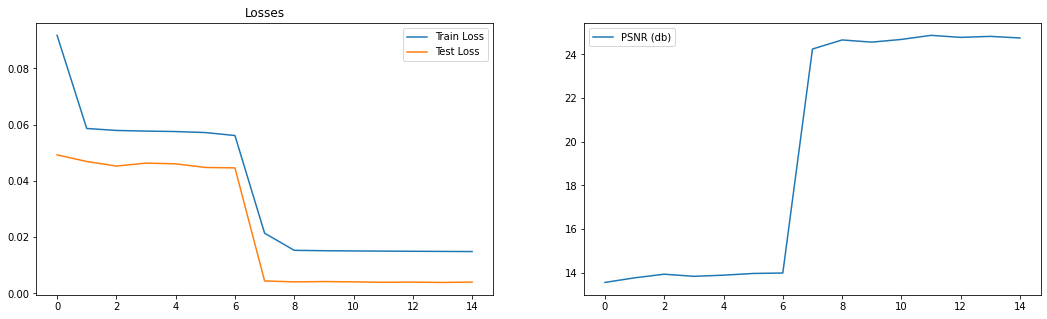

Elapsed time: 240.08705139160156


In [30]:
plot(training_results[2])

In [10]:
#3
# Baseline with l2 loss, Unet with leakyRelu and no shared weights, same as paper.
# Now with added Batchnorm2D
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 400
    num_workers : 4
    device : None
    net : Unet2
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : False
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0406 |test loss: 0.0091 |psnr(dB): 21.5686
Epoch: 2/15 |train loss: 0.0176 |test loss: 0.0051 |psnr(dB): 23.5711
Epoch: 3/15 |train loss: 0.0164 |test loss: 0.0050 |psnr(dB): 23.7413
Epoch: 4/15 |train loss: 0.0160 |test loss: 0.0046 |psnr(dB): 24.1081
Epoch: 5/15 |train loss: 0.0158 |test loss: 0.0046 |psnr(dB): 24.1209
Epoch: 6/15 |train loss: 0.0155 |test loss: 0.0046 |psnr(dB): 24.1616
Epoch: 7/15 |train loss: 0.0154 |test loss: 0.0042 |psnr(dB): 24.5318
Epoch: 8/15 |train loss: 0.0154 |test loss: 0.0041 |psnr(dB): 24.5369
Epoch: 9/15 |train loss: 0.015

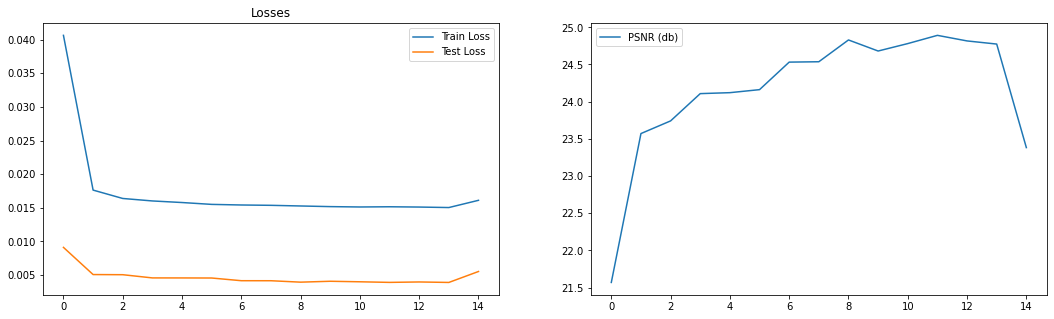

Elapsed time: 262.95166754722595


In [31]:
plot(training_results[3])

In [11]:
#4
# best architecture seems to be with weight sharing
# Let's stick to  l2 loss, Unet with shared weights
# Let's add normalization
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 400
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0262 |test loss: 0.0052 |psnr(dB): 23.5122
Epoch: 2/15 |train loss: 0.0157 |test loss: 0.0044 |psnr(dB): 24.2071
Epoch: 3/15 |train loss: 0.0153 |test loss: 0.0044 |psnr(dB): 24.3076
Epoch: 4/15 |train loss: 0.0151 |test loss: 0.0040 |psnr(dB): 24.7961
Epoch: 5/15 |train loss: 0.0150 |test loss: 0.0040 |psnr(dB): 24.7996
Epoch: 6/15 |train loss: 0.0149 |test loss: 0.0041 |psnr(dB): 24.5923
Epoch: 7/15 |train loss: 0.0149 |test loss: 0.0039 |psnr(dB): 24.9436
Epoch: 8/15 |train loss: 0.0148 |test loss: 0.0040 |psnr(dB): 24.7831
Epoch: 9/15 |train loss: 0.0147 

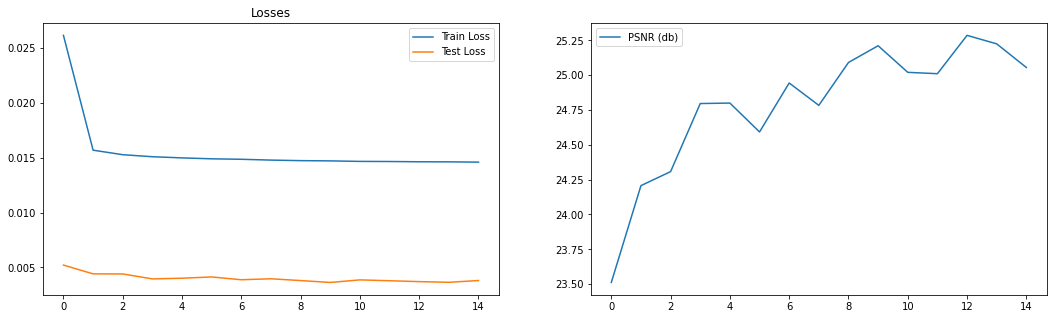

Elapsed time: 238.19749236106873


In [32]:
plot(training_results[4])

In [12]:
#5
# normalization doesn't seem to help much, but this is because I saw that test and val data have
# almost the same mean and std, so it doesn't make much difference, but it will help generalization for
# sure, let's keep it.
# Let's add data augmentation, it will double the data adding rotations and flips
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 400
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : True
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0205 |test loss: 0.0046 |psnr(dB): 24.1732
Epoch: 2/15 |train loss: 0.0152 |test loss: 0.0041 |psnr(dB): 24.6443
Epoch: 3/15 |train loss: 0.0149 |test loss: 0.0043 |psnr(dB): 24.3720
Epoch: 4/15 |train loss: 0.0148 |test loss: 0.0040 |psnr(dB): 24.7638
Epoch: 5/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 24.9251
Epoch: 6/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 24.9337
Epoch: 7/15 |train loss: 0.0146 |test loss: 0.0039 |psnr(dB): 24.8915
Epoch: 8/15 |train loss: 0.0146 |test loss: 0.0041 |psnr(dB): 24.6205
Epoch: 9/15 |train loss: 0.0146 |

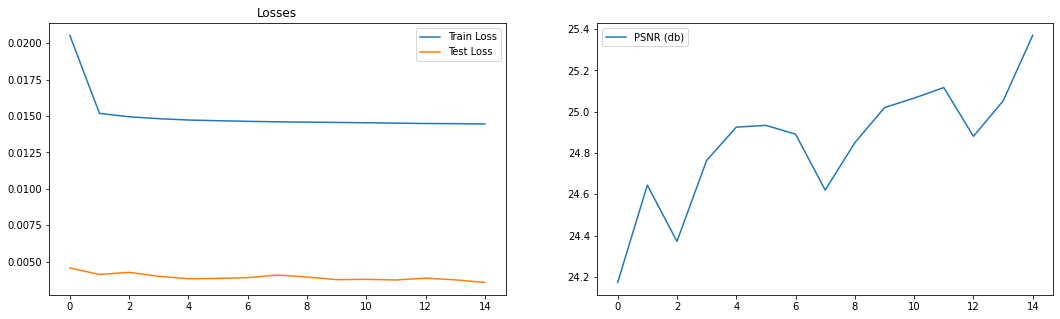

Elapsed time: 421.27920794487


In [33]:
plot(training_results[5])

In [14]:
#6
# Similar to normalization, data augmentation improves generalization but our valid data is
# very similar to the training data, so the improvement doesn't seem much
# Now with a smaller batch, from 400 to 200, improves convergence speed and computation time is still
# under 10 minutes (450s) with nvidia rtx 3070
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 200
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : True
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0181 |test loss: 0.0043 |psnr(dB): 24.4512
Epoch: 2/15 |train loss: 0.0149 |test loss: 0.0039 |psnr(dB): 24.9527
Epoch: 3/15 |train loss: 0.0148 |test loss: 0.0040 |psnr(dB): 24.7064
Epoch: 4/15 |train loss: 0.0146 |test loss: 0.0038 |psnr(dB): 25.1158
Epoch: 5/15 |train loss: 0.0146 |test loss: 0.0037 |psnr(dB): 25.2158
Epoch: 6/15 |train loss: 0.0146 |test loss: 0.0039 |psnr(dB): 24.8474
Epoch: 7/15 |train loss: 0.0145 |test loss: 0.0036 |psnr(dB): 25.3029
Epoch: 8/15 |train loss: 0.0145 |test loss: 0.0038 |psnr(dB): 24.9884
Epoch: 9/15 |train loss: 0.0145 |

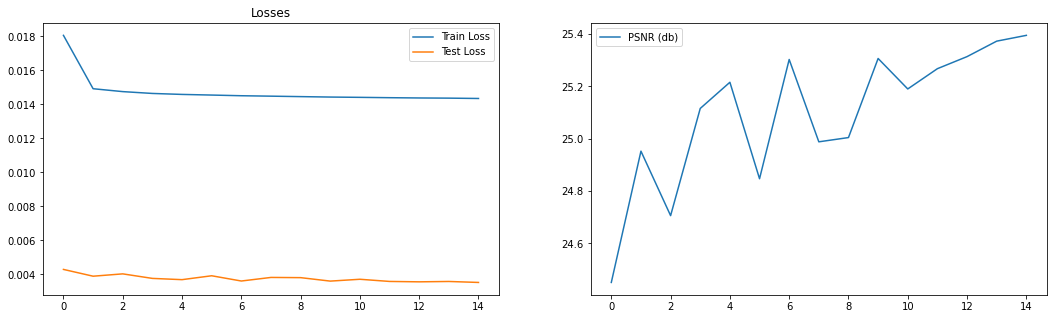

Elapsed time: 455.1740653514862


In [34]:
plot(training_results[6])

In [18]:
#7
# Now batch size 100. It reaches higher than ever peaks, but it is really unstable. (530s of computation time)
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : True
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0168 |test loss: 0.0041 |psnr(dB): 24.7541
Epoch: 2/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.1139
Epoch: 3/15 |train loss: 0.0146 |test loss: 0.0038 |psnr(dB): 24.9867
Epoch: 4/15 |train loss: 0.0145 |test loss: 0.0037 |psnr(dB): 25.1186
Epoch: 5/15 |train loss: 0.0145 |test loss: 0.0036 |psnr(dB): 25.2229
Epoch: 6/15 |train loss: 0.0144 |test loss: 0.0036 |psnr(dB): 25.2990
Epoch: 7/15 |train loss: 0.0144 |test loss: 0.0036 |psnr(dB): 25.3276
Epoch: 8/15 |train loss: 0.0144 |test loss: 0.0036 |psnr(dB): 25.3376
Epoch: 9/15 |train loss: 0.0144 |

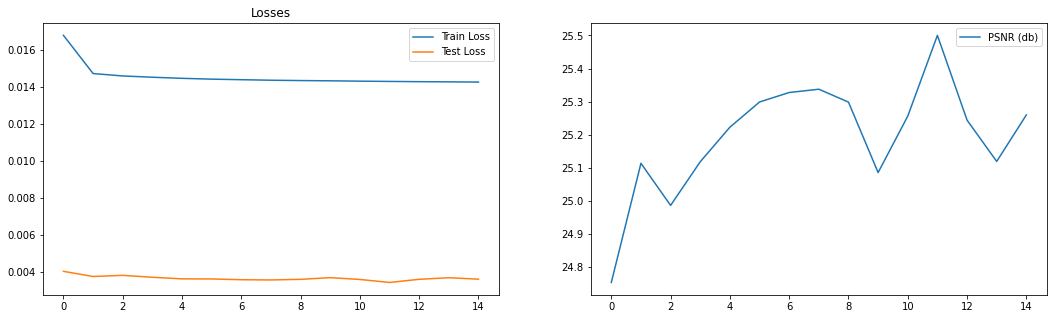

Elapsed time: 526.5275256633759


In [35]:
plot(training_results[7])

In [36]:
#8
# I temporarily disabled data augmentation for a faster training. Now with less
# filters on convolutions, from 48 (from paper) to 24.
# It reaches even higher scores in 15 epochs
# Maybe there's less overfitting? It also looks more stable

epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0225 |test loss: 0.0046 |psnr(dB): 24.0723
Epoch: 2/15 |train loss: 0.0153 |test loss: 0.0042 |psnr(dB): 24.4929
Epoch: 3/15 |train loss: 0.0150 |test loss: 0.0039 |psnr(dB): 24.9319
Epoch: 4/15 |train loss: 0.0149 |test loss: 0.0041 |psnr(dB): 24.6734
Epoch: 5/15 |train loss: 0.0148 |test loss: 0.0038 |psnr(dB): 25.0725
Epoch: 6/15 |train loss: 0.0148 |test loss: 0.0039 |psnr(dB): 24.9630
Epoch: 7/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0598
Epoch: 8/15 |train loss: 0.0147 |test loss: 0.0039 |psnr(dB): 24.9211
Epoch: 9/15 |train loss: 0.0146 

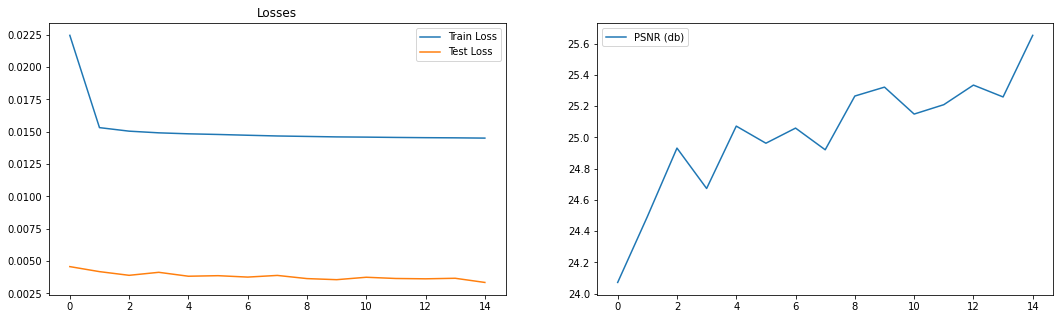

Elapsed time: 196.00768899917603


In [37]:
plot(training_results[8])

In [38]:
#9
# Let's stick to 24 initial depth of conv2d
# To stabilize, we can introduce a scheduler that reduces lr, but we can increase the initial lr
# Let's do a grid search for lr first, disabling data augmentation to make it faster


# lr = 0.01
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.01, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0267 |test loss: 0.0042 |psnr(dB): 24.4700
Epoch: 2/15 |train loss: 0.0152 |test loss: 0.0040 |psnr(dB): 24.7263
Epoch: 3/15 |train loss: 0.0150 |test loss: 0.0038 |psnr(dB): 25.0304
Epoch: 4/15 |train loss: 0.0150 |test loss: 0.0041 |psnr(dB): 24.6908
Epoch: 5/15 |train loss: 0.0150 |test loss: 0.0041 |psnr(dB): 24.6410
Epoch: 6/15 |train loss: 0.0149 |test loss: 0.0043 |psnr(dB): 24.4055
Epoch: 7/15 |train loss: 0.0149 |test loss: 0.0039 |psnr(dB): 24.9022
Epoch: 8/15 |train loss: 0.0148 |test loss: 0.0039 |psnr(dB): 24.8980
Epoch: 9/15 |train loss: 0.0148 |

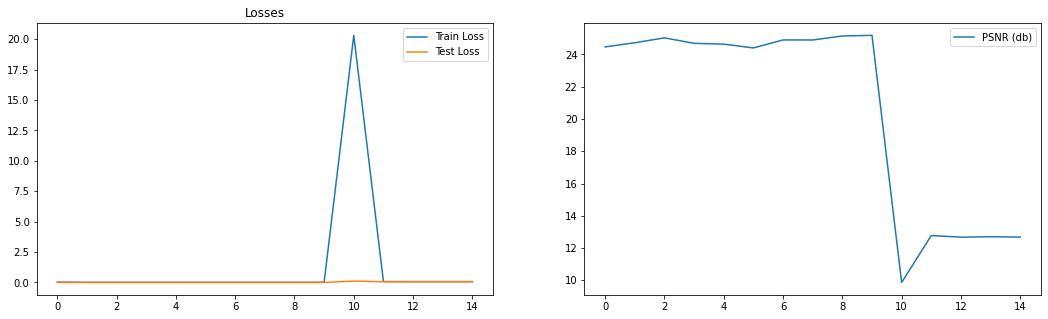

Elapsed time: 196.98899626731873


In [39]:
plot(training_results[9])

In [43]:
#10

# lr = 0.008
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.008, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0240 |test loss: 0.0043 |psnr(dB): 24.3365
Epoch: 2/15 |train loss: 0.0153 |test loss: 0.0045 |psnr(dB): 24.0093
Epoch: 3/15 |train loss: 0.0150 |test loss: 0.0038 |psnr(dB): 25.0080
Epoch: 4/15 |train loss: 0.0149 |test loss: 0.0041 |psnr(dB): 24.7128
Epoch: 5/15 |train loss: 0.0149 |test loss: 0.0040 |psnr(dB): 24.8850
Epoch: 6/15 |train loss: 0.0149 |test loss: 0.0040 |psnr(dB): 24.8535
Epoch: 7/15 |train loss: 0.0149 |test loss: 0.0038 |psnr(dB): 25.0258
Epoch: 8/15 |train loss: 0.0148 |test loss: 0.0039 |psnr(dB): 24.8946
Epoch: 9/15 |train loss: 0.0148 

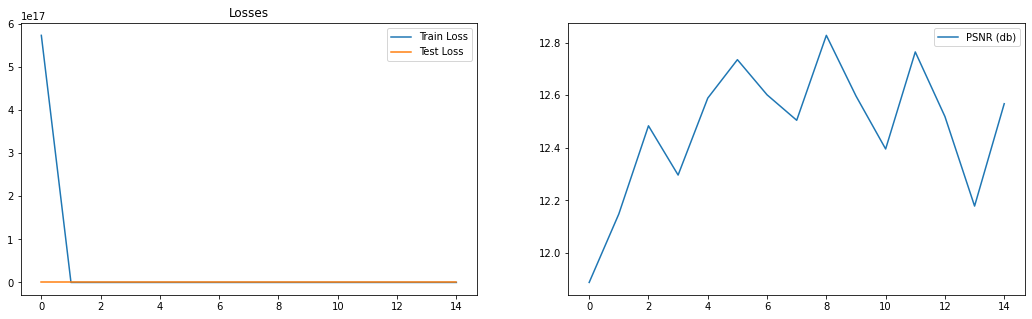

Elapsed time: 195.9486846923828


In [44]:
plot(training_results[10])

In [45]:
#11

# lr = 0.006
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.006, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0227 |test loss: 0.0042 |psnr(dB): 24.4659
Epoch: 2/15 |train loss: 0.0151 |test loss: 0.0039 |psnr(dB): 24.8772
Epoch: 3/15 |train loss: 0.0150 |test loss: 0.0038 |psnr(dB): 25.0501
Epoch: 4/15 |train loss: 0.0149 |test loss: 0.0041 |psnr(dB): 24.6917
Epoch: 5/15 |train loss: 0.0148 |test loss: 0.0040 |psnr(dB): 24.8455
Epoch: 6/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0836
Epoch: 7/15 |train loss: 0.0147 |test loss: 0.0037 |psnr(dB): 25.1484
Epoch: 8/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0377
Epoch: 9/15 |train loss: 0.0146 

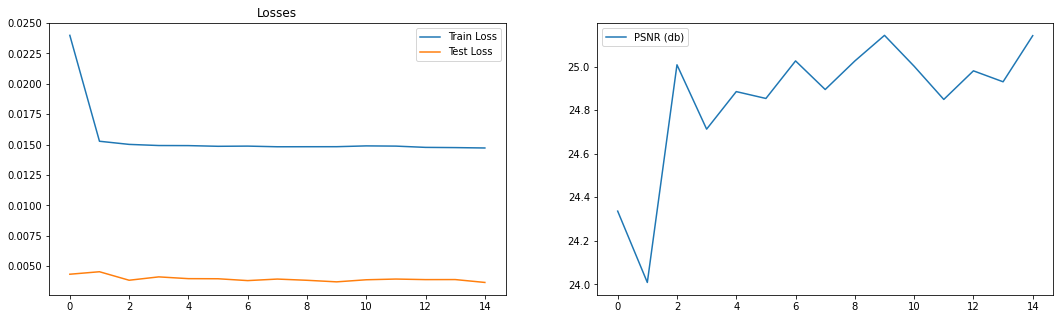

Elapsed time: 194.73840188980103


In [46]:
plot(training_results[11])

In [47]:
#12

# lr = 0.004
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.004, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0216 |test loss: 0.0042 |psnr(dB): 24.4727
Epoch: 2/15 |train loss: 0.0151 |test loss: 0.0041 |psnr(dB): 24.6546
Epoch: 3/15 |train loss: 0.0149 |test loss: 0.0039 |psnr(dB): 24.9340
Epoch: 4/15 |train loss: 0.0148 |test loss: 0.0040 |psnr(dB): 24.9020
Epoch: 5/15 |train loss: 0.0147 |test loss: 0.0037 |psnr(dB): 25.2431
Epoch: 6/15 |train loss: 0.0147 |test loss: 0.0037 |psnr(dB): 25.1540
Epoch: 7/15 |train loss: 0.0147 |test loss: 0.0039 |psnr(dB): 24.8233
Epoch: 8/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0945
Epoch: 9/15 |train loss: 0.0146 

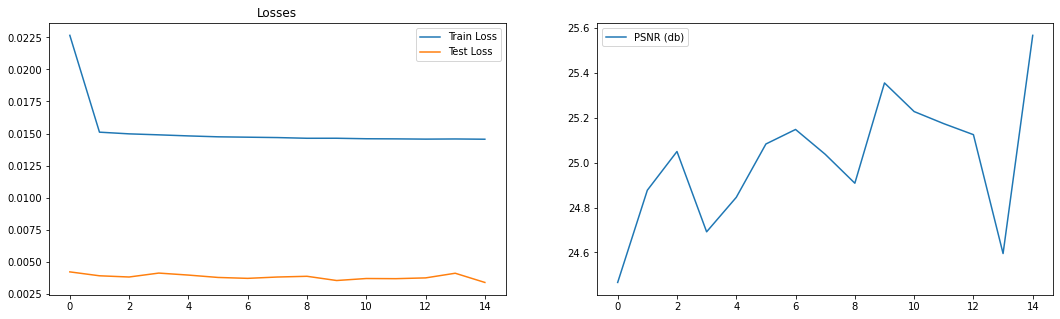

Elapsed time: 199.5553765296936


In [48]:
plot(training_results[12])

In [49]:
#13

# lr = 0.002
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.002, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0206 |test loss: 0.0044 |psnr(dB): 24.2256
Epoch: 2/15 |train loss: 0.0151 |test loss: 0.0039 |psnr(dB): 24.8025
Epoch: 3/15 |train loss: 0.0149 |test loss: 0.0038 |psnr(dB): 25.0934
Epoch: 4/15 |train loss: 0.0148 |test loss: 0.0040 |psnr(dB): 24.8466
Epoch: 5/15 |train loss: 0.0147 |test loss: 0.0037 |psnr(dB): 25.2181
Epoch: 6/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0792
Epoch: 7/15 |train loss: 0.0147 |test loss: 0.0037 |psnr(dB): 25.1938
Epoch: 8/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0198
Epoch: 9/15 |train loss: 0.0146 

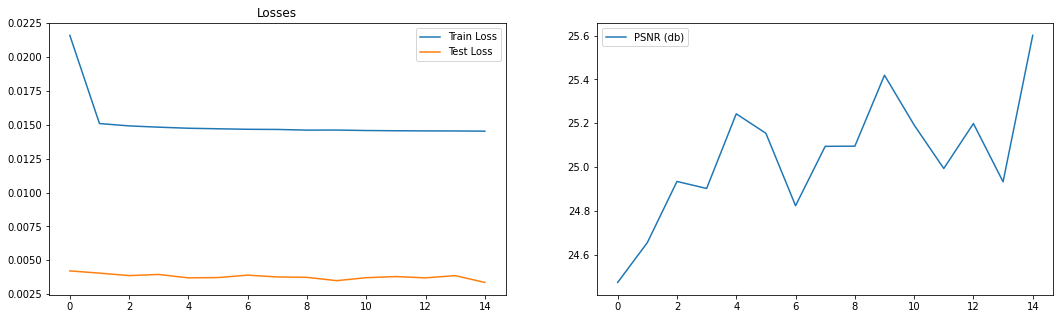

Elapsed time: 194.55883622169495


In [50]:
plot(training_results[13])

Learning rates higher than 0.006 seem to be too unstable, 0.006 is the fastest to reach over 25dB but 0.001 reaches the highest peak in the end,
 we might try to start from 0.006 and reduce it. Anyway, train loss doesn't seem to get lower than 0.015
 I'll try to augment the number of epochs to see if we can go lower.

In [13]:
#14

# Start with lr= 0.006, using scheduler to half the lr
# every 3 epochs of worse performance. 40 Epochs
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 40
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.006, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/40 |train loss: 0.0227 |test loss: 0.0042 |psnr(dB): 24.4659
Epoch: 2/40 |train loss: 0.0151 |test loss: 0.0039 |psnr(dB): 24.8772
Epoch: 3/40 |train loss: 0.0150 |test loss: 0.0038 |psnr(dB): 25.0501
Epoch: 4/40 |train loss: 0.0149 |test loss: 0.0041 |psnr(dB): 24.6917
Epoch: 5/40 |train loss: 0.0148 |test loss: 0.0040 |psnr(dB): 24.8455
Epoch: 6/40 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0836
Epoch: 7/40 |train loss: 0.0147 |test loss: 0.0037 |psnr(dB): 25.1484
Epoch: 8/40 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0377
Epoch: 9/40 |train loss: 0.0146 

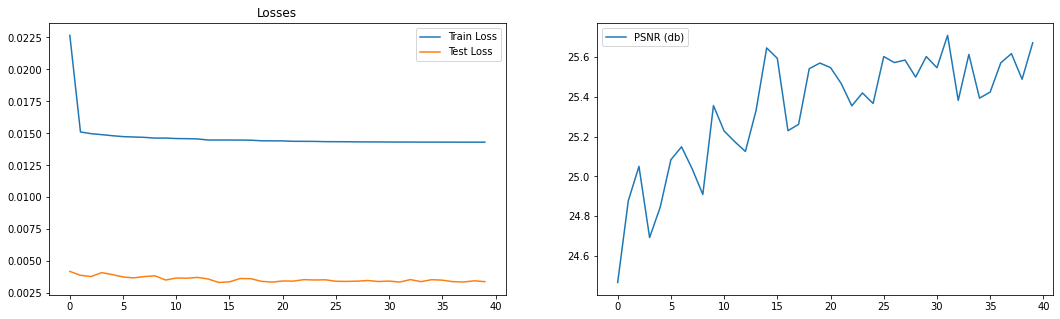

Elapsed time: 620.8050901889801


In [14]:
plot(training_results[14])

In [15]:
#15
# Before scheduler was monitoring val loss, let's now monitor the psnr
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 40
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.006, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/40 |train loss: 0.0227 |test loss: 0.0042 |psnr(dB): 24.4659
Epoch: 2/40 |train loss: 0.0151 |test loss: 0.0039 |psnr(dB): 24.8772
Epoch: 3/40 |train loss: 0.0150 |test loss: 0.0038 |psnr(dB): 25.0501
Epoch: 4/40 |train loss: 0.0149 |test loss: 0.0041 |psnr(dB): 24.6917
Epoch: 5/40 |train loss: 0.0148 |test loss: 0.0040 |psnr(dB): 24.8455
Epoch: 6/40 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0836
Epoch: 7/40 |train loss: 0.0147 |test loss: 0.0037 |psnr(dB): 25.1484
Epoch: 8/40 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.0377
Epoch: 9/40 |train loss: 0.0146 

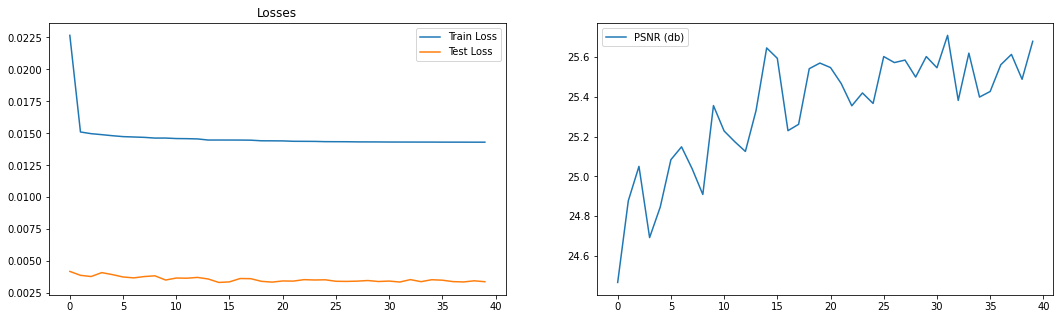

Elapsed time: 620.0729150772095


In [16]:
plot(training_results[15])

There's not much difference in the two methods of scheduling, the min loss reached is 0.033,
Let's keep scheduler monitoring the val loss

In [5]:
#16
# Last try with original noise2noise architecture on more epochs, 40
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 40
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet2
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : False
    verbose : True
Training started.
Epoch: 1/40 |train loss: 0.0266 |test loss: 0.0042 |psnr(dB): 24.5442
Epoch: 2/40 |train loss: 0.0150 |test loss: 0.0039 |psnr(dB): 24.9170
Epoch: 3/40 |train loss: 0.0148 |test loss: 0.0037 |psnr(dB): 25.1518
Epoch: 4/40 |train loss: 0.0148 |test loss: 0.0039 |psnr(dB): 24.9900
Epoch: 5/40 |train loss: 0.0147 |test loss: 0.0037 |psnr(dB): 25.1617
Epoch: 6/40 |train loss: 0.0147 |test loss: 0.0036 |psnr(dB): 25.2321
Epoch: 7/40 |train loss: 0.0146 |test loss: 0.0036 |psnr(dB): 25.2155
Epoch: 8/40 |train loss: 0.0146 |test loss: 0.0038 |psnr(dB): 24.9862
Epoch: 9/40 |train loss: 0.0145

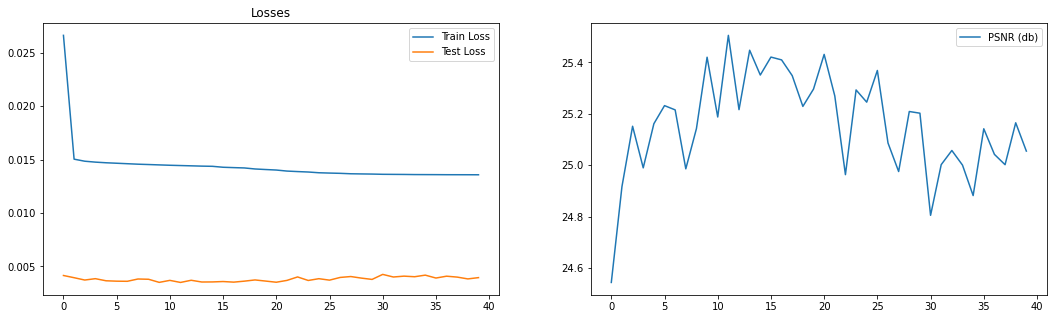

Elapsed time: 858.5793833732605


In [6]:
plot(training_results[16])

Original noise2noise architecture seems to slowly diverge on the long run and it doesn't reach
the same low values of val loss as our lighter model, with much less weights (any ideas why so?)

In [5]:
#17
#Getting back to our light model, let's add data augmentation
# and see how it performs on 40 epochs
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 40
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.006, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : True
    verbose : True
Training started.
Epoch: 1/40 |train loss: 0.0185 |test loss: 0.0040 |psnr(dB): 24.8352
Epoch: 2/40 |train loss: 0.0149 |test loss: 0.0038 |psnr(dB): 25.0534
Epoch: 3/40 |train loss: 0.0147 |test loss: 0.0036 |psnr(dB): 25.3100
Epoch: 4/40 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.1511
Epoch: 5/40 |train loss: 0.0146 |test loss: 0.0037 |psnr(dB): 25.2173
Epoch: 6/40 |train loss: 0.0146 |test loss: 0.0038 |psnr(dB): 25.1165
Epoch     6: reducing learning rate of group 0 to 3.0000e-03.
Epoch: 7/40 |train loss: 0.0145 |test loss: 0.0035 |psnr(dB): 25.4260
Epoch: 8/40 |train loss: 0.0145 |test los

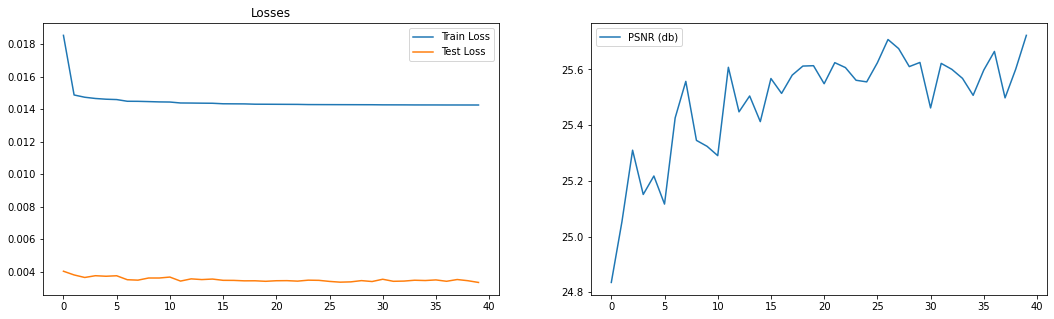

Elapsed time: 1088.2576489448547


In [6]:
plot(training_results[17])

Results are good, the val loss is stable, improvement is mainly in the first epochs
so we can reduce the number of epochs, stay under 10 minutes of training and save our best model now

In [24]:
#18
# Saving our best model on 20 epochs
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

[autoreload of model failed: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\extensions\autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\extensions\autoreload.py", line 266, in update_function
    setattr(old, name, getattr(ne

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 20
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet
    optimizer : Adam
    optimizer_params : [0.006, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : True
    verbose : True
Training started.
Epoch: 1/20 |train loss: 0.0185 |test loss: 0.0040 |psnr(dB): 24.8352
Epoch: 2/20 |train loss: 0.0149 |test loss: 0.0038 |psnr(dB): 25.0534
Epoch: 3/20 |train loss: 0.0147 |test loss: 0.0036 |psnr(dB): 25.3100
Epoch: 4/20 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.1511
Epoch: 5/20 |train loss: 0.0146 |test loss: 0.0037 |psnr(dB): 25.2173
Epoch: 6/20 |train loss: 0.0146 |test loss: 0.0038 |psnr(dB): 25.1165
Epoch     6: reducing learning rate of group 0 to 3.0000e-03.
Epoch: 7/20 |train loss: 0.0145 |test loss: 0.0035 |psnr(dB): 25.4260
Epoch: 8/20 |train loss: 0.0145 |test los

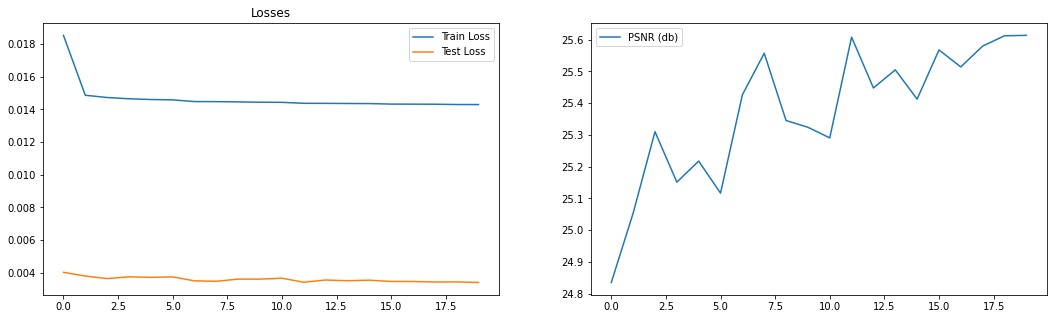

Elapsed time: 510.2154517173767


In [26]:
plot(training_results[18])

In [46]:
# saving training results in a pickle
import pickle
file_name = "results.pkl"
open_file = open(file_name, "wb")
pickle.dump(training_results, open_file)
open_file.close()

In [28]:
# let's test it
n2n_model = Model()
n2n_model.load_pretrained_model()
val_noisy_x, val_clean_y = torch.load(Config.val_data_path)
outputs = n2n_model.predict(val_noisy_x)
psnr = 20*torch.log10(torch.tensor(1.0))-10*torch.log10(((outputs.div(255) - val_clean_y.div(255))**2).mean((1, 2, 3))).mean()
print(f"psnr (dB): {psnr}")

psnr (dB): 25.551340103149414


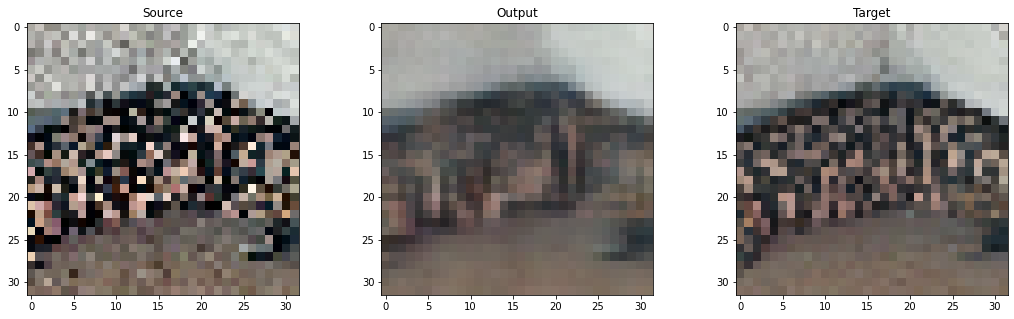

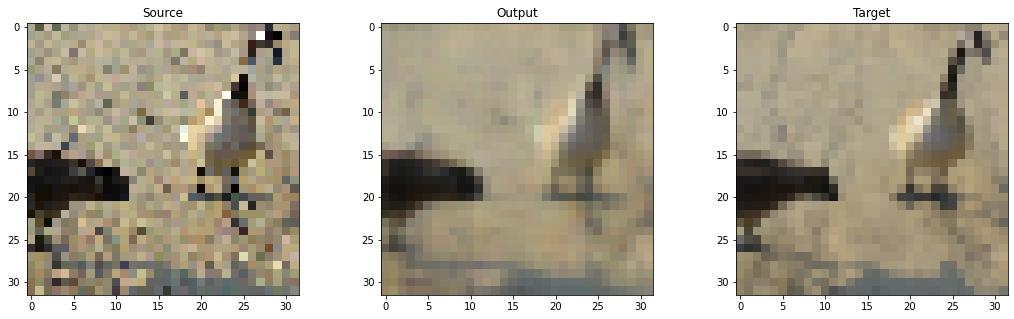

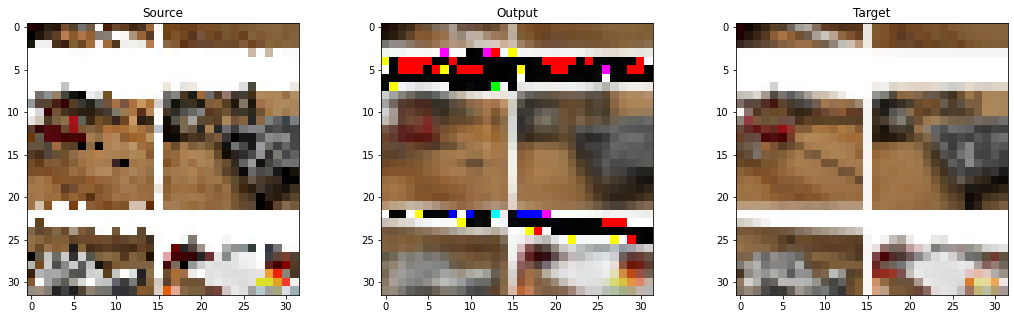

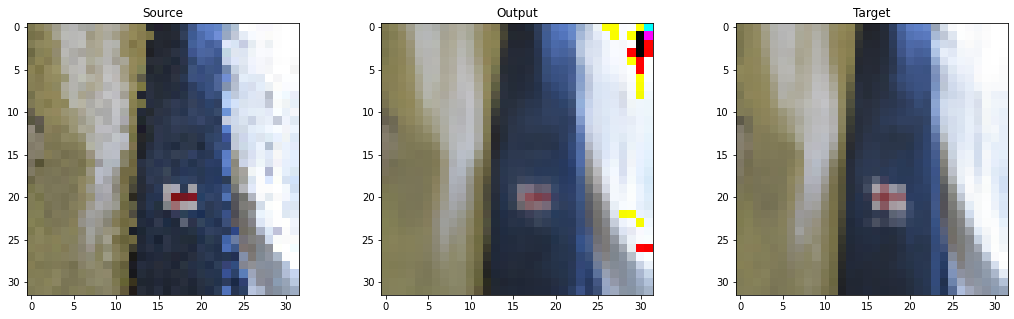

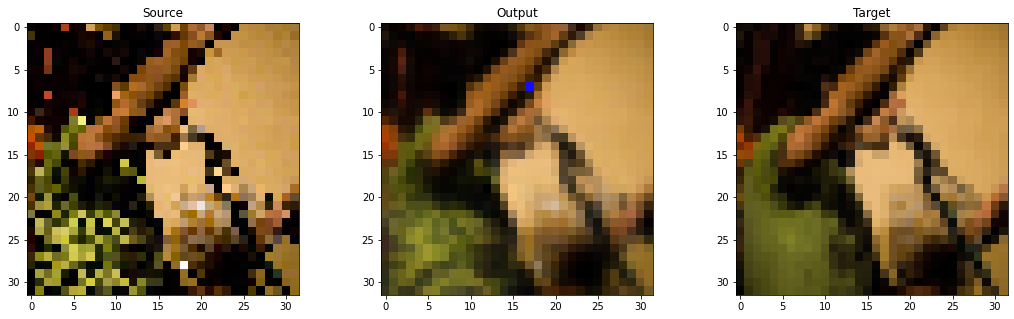

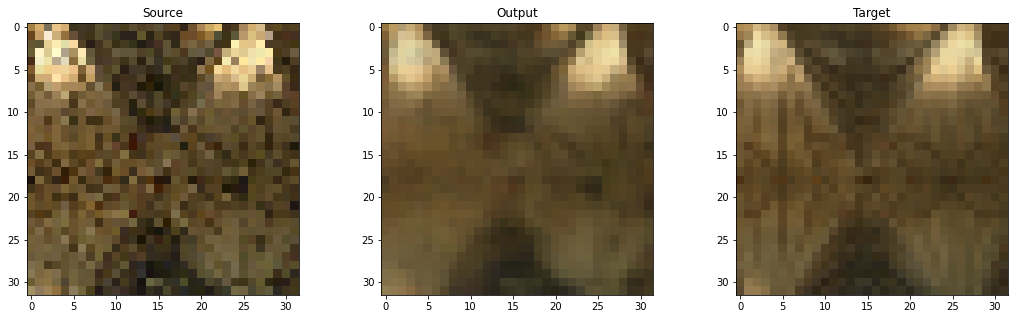

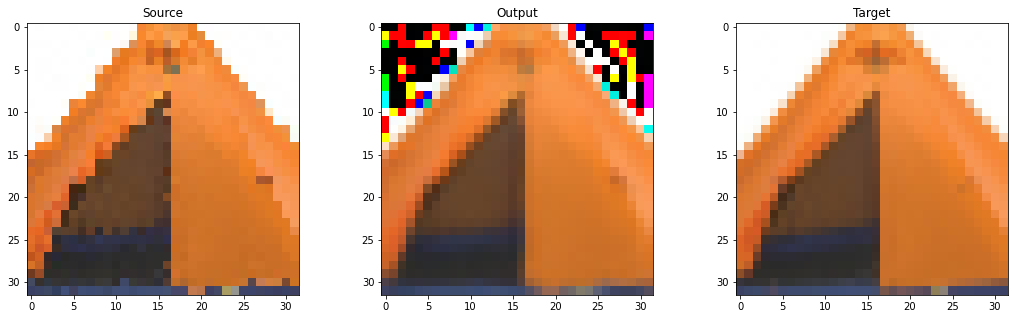

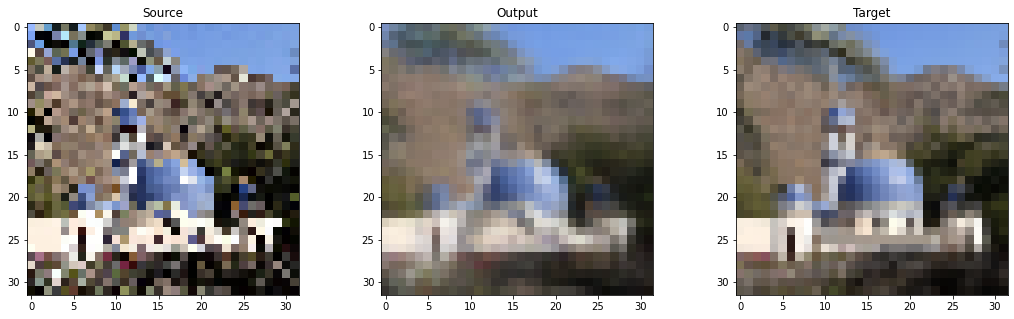

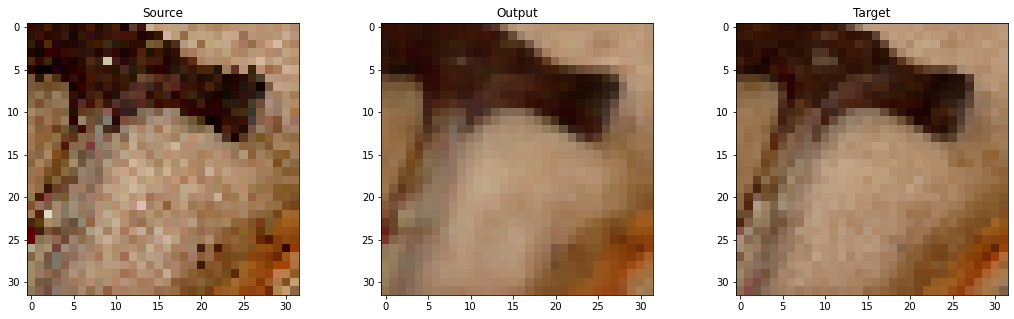

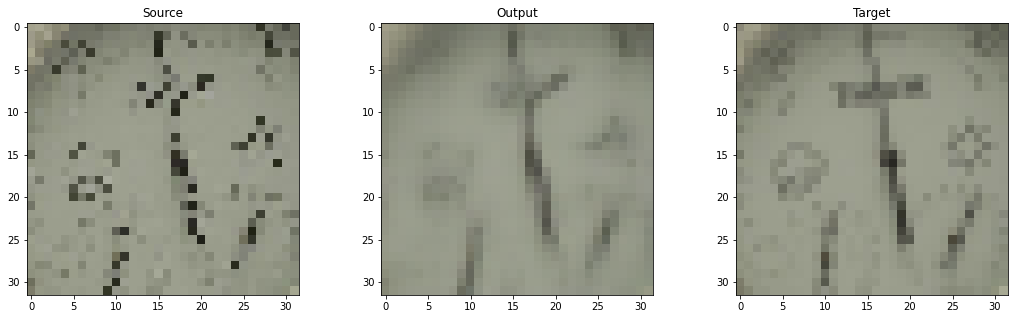

In [44]:
ids = torch.randperm(val_noisy_x.shape[0])
ids = ids[:10]
for id in ids:
    fig, axs = plt.subplots(1, 3)
    axs.flat[0].imshow(val_noisy_x[id].permute(1, 2, 0))
    axs.flat[0].set_title("Source")
    axs.flat[1].imshow(outputs[id].detach().type(torch.ByteTensor).permute(1, 2, 0))
    axs.flat[1].set_title("Output")
    axs.flat[2].imshow(val_clean_y[id].permute(1, 2, 0))
    axs.flat[2].set_title("Target")
    #fig.supxlabel("Epochs")
    #fig.supylabel("Metrics")
    fig = plt.gcf()
    fig.set_size_inches(18, 5)

    plt.show()

There are some weird artifacts in some pictures, is it the case with original architecture from noise2noise as well?

In [6]:
#19
# Saving our best model from original architecture on 15 epochs
epochs_losses, validation_losses, validation_psnr, elapsed_time = main()
training_results.append([epochs_losses, validation_losses, validation_psnr, elapsed_time])

Running configuration:
    train_data_path : ./others/dataset/train_data.pkl
    val_data_path : ./others/dataset/val_data.pkl
    seed : 23
    num_epochs : 15
    batch_size : 100
    num_workers : 4
    device : None
    net : Unet2
    optimizer : Adam
    optimizer_params : [0.001, 0.9, 0.999, 1e-08]
    loss : l2
    normalize : True
    data_augmentation : True
    verbose : True
Training started.
Epoch: 1/15 |train loss: 0.0218 |test loss: 0.0040 |psnr(dB): 24.9261
Epoch: 2/15 |train loss: 0.0148 |test loss: 0.0038 |psnr(dB): 25.0126
Epoch: 3/15 |train loss: 0.0147 |test loss: 0.0038 |psnr(dB): 25.1592
Epoch: 4/15 |train loss: 0.0146 |test loss: 0.0036 |psnr(dB): 25.3929
Epoch: 5/15 |train loss: 0.0145 |test loss: 0.0035 |psnr(dB): 25.4357
Epoch: 6/15 |train loss: 0.0145 |test loss: 0.0035 |psnr(dB): 25.4094
Epoch: 7/15 |train loss: 0.0144 |test loss: 0.0035 |psnr(dB): 25.4866
Epoch: 8/15 |train loss: 0.0144 |test loss: 0.0035 |psnr(dB): 25.5294
Epoch: 9/15 |train loss: 0.0144 

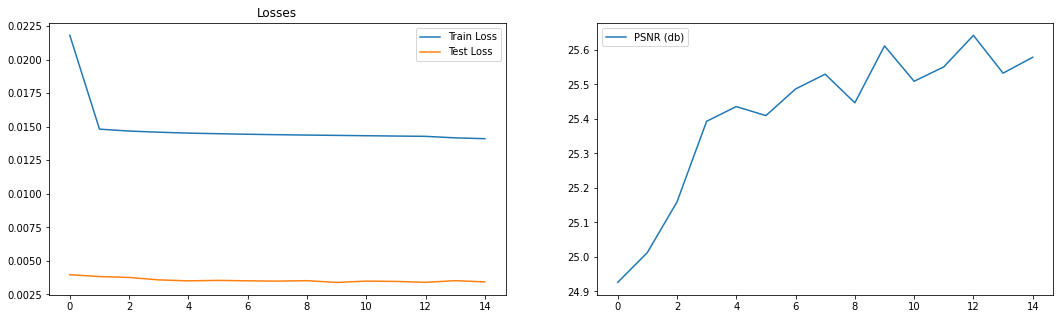

Elapsed time: 567.45285987854


In [7]:
plot(training_results[19])

In [8]:
# let's test it
n2n_model = Model()
n2n_model.load_pretrained_model()
val_noisy_x, val_clean_y = torch.load(Config.val_data_path)
outputs = n2n_model.predict(val_noisy_x)
psnr = 20*torch.log10(torch.tensor(1.0))-10*torch.log10(((outputs.div(255) - val_clean_y.div(255))**2).mean((1, 2, 3))).mean()
print(f"psnr (dB): {psnr}")

psnr (dB): 25.50480842590332


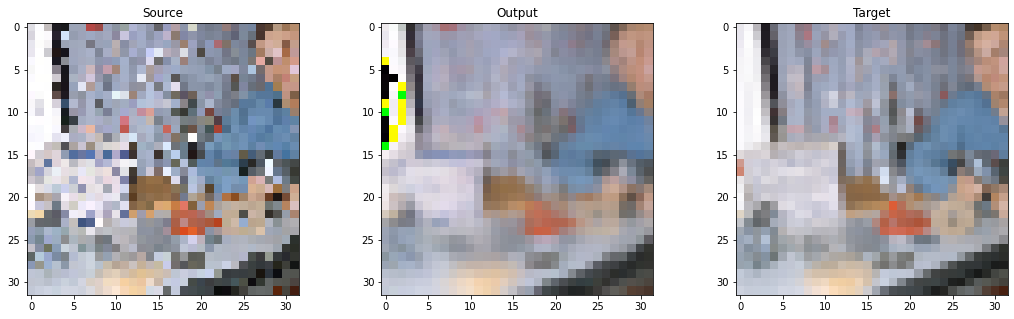

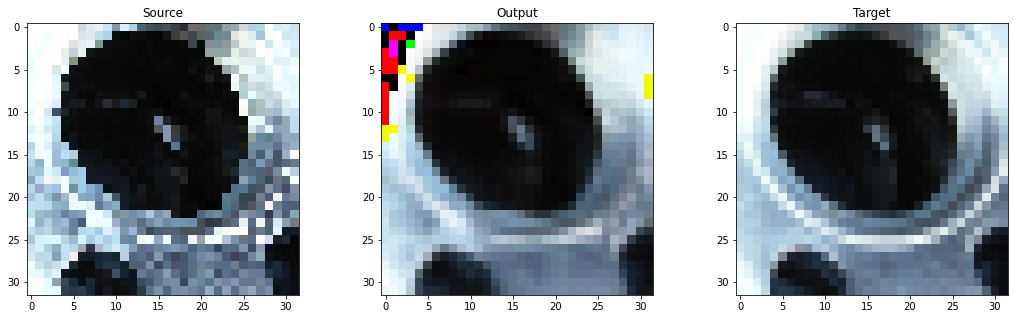

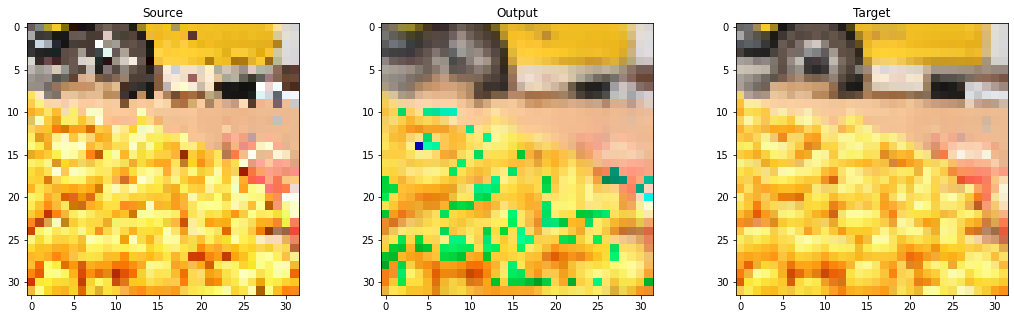

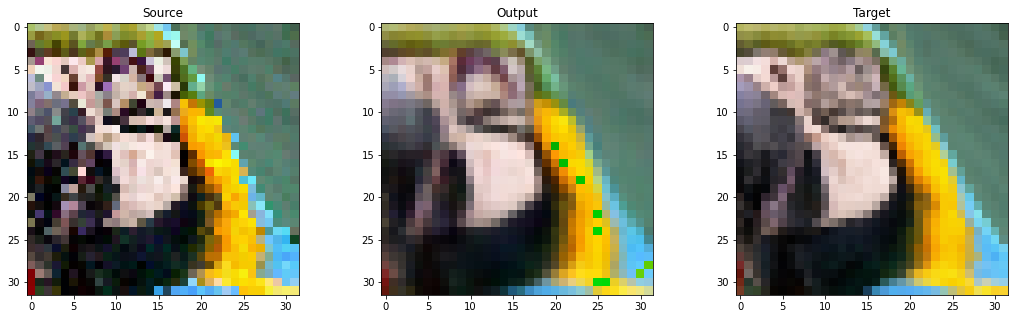

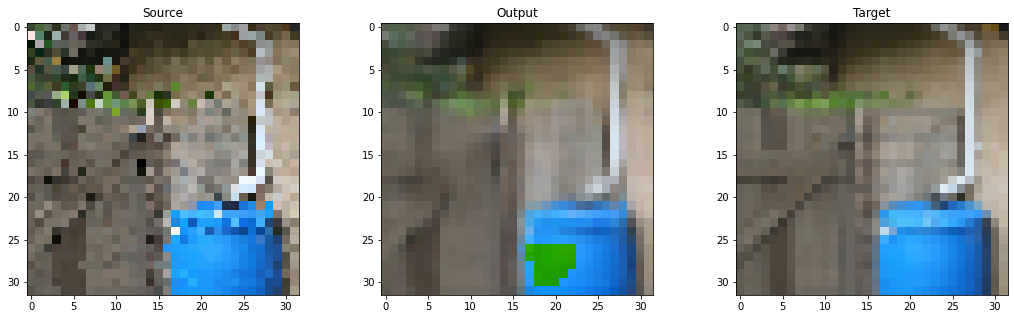

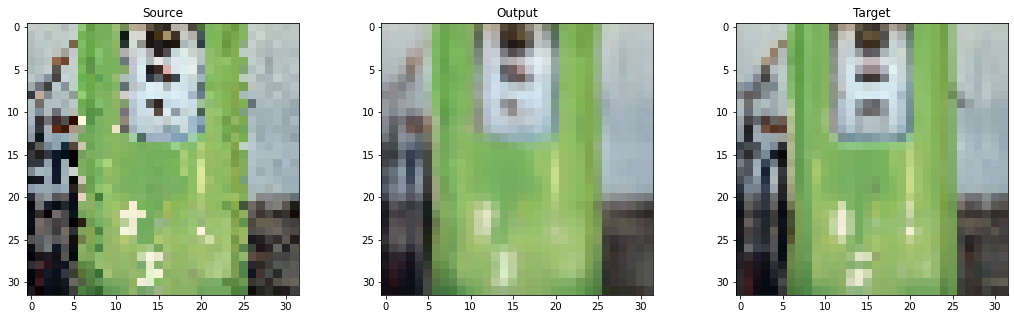

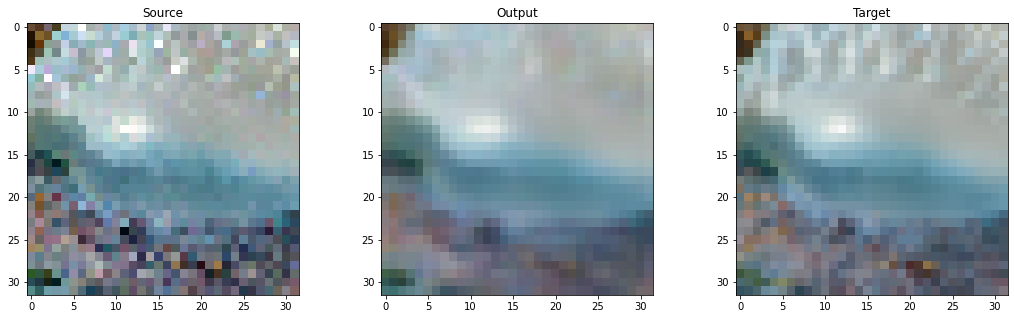

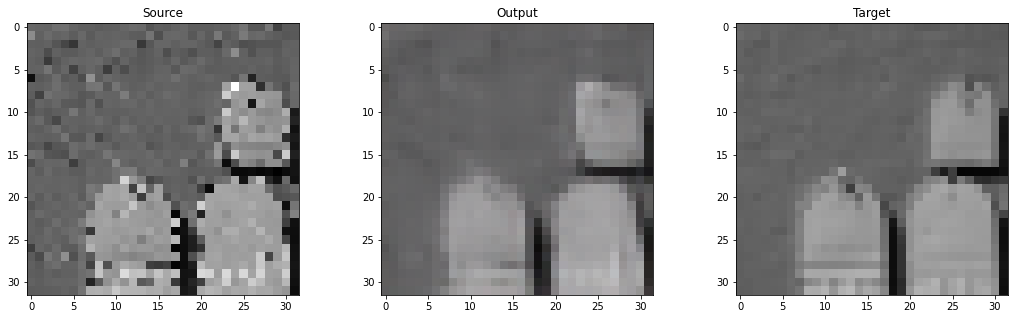

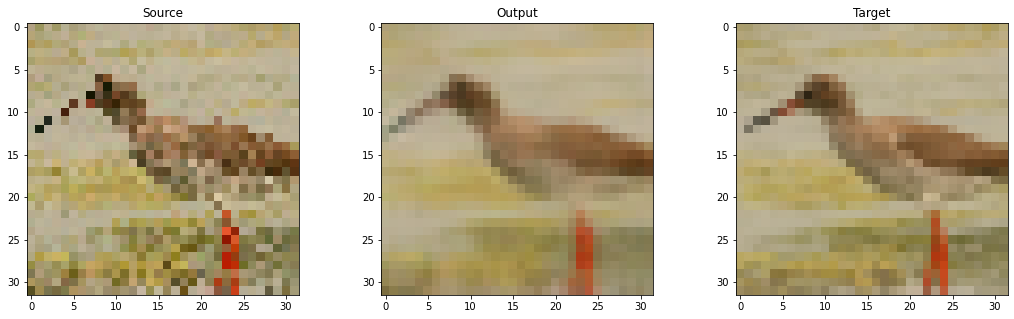

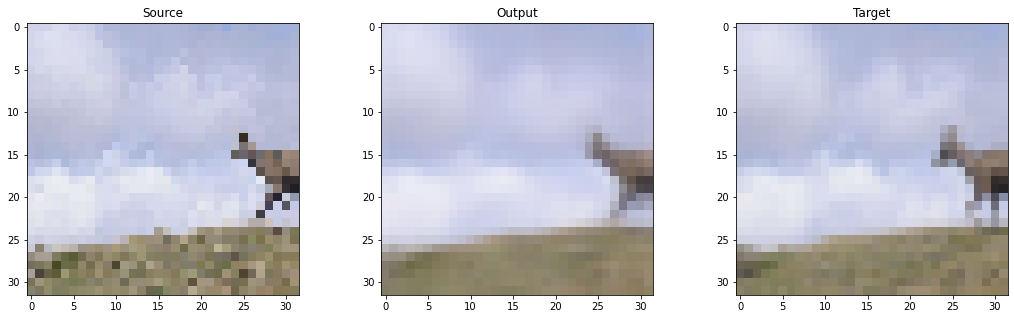

In [10]:
ids = torch.randperm(val_noisy_x.shape[0])
ids = ids[:10]
for id in ids:
    fig, axs = plt.subplots(1, 3)
    axs.flat[0].imshow(val_noisy_x[id].permute(1, 2, 0))
    axs.flat[0].set_title("Source")
    axs.flat[1].imshow(outputs[id].detach().type(torch.ByteTensor).permute(1, 2, 0))
    axs.flat[1].set_title("Output")
    axs.flat[2].imshow(val_clean_y[id].permute(1, 2, 0))
    axs.flat[2].set_title("Target")
    #fig.supxlabel("Epochs")
    #fig.supylabel("Metrics")
    fig = plt.gcf()
    fig.set_size_inches(18, 5)

    plt.show()

Artifacts are still there...
